# Описание датасета

1. school — аббревиатура школы, в которой учится ученик
2. sex — пол ученика ('F' - женский, 'M' - мужской)
3. age — возраст ученика (от 15 до 22)
4. address — тип адреса ученика ('U' - городской, 'R' - за городом)
5. famsize — размер семьи('LE3' <= 3, 'GT3' >3)
6. Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)
7. Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
8. Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
9. Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
10. Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
11. reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)
12. guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)
13. traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)
14. studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)
15. failures — количество внеучебных неудач (n, если 1<=n<3, иначе 0)
16. schoolsup — дополнительная образовательная поддержка (yes или no)
17. famsup — семейная образовательная поддержка (yes или no)
18. paid — дополнительные платные занятия по математике (yes или no)
19. activities — дополнительные внеучебные занятия (yes или no)
20. nursery — посещал детский сад (yes или no)
21. higher — хочет получить высшее образование (yes или no)
22. internet — наличие интернета дома (yes или no)
23. romantic — в романтических отношениях (yes или no)
24. famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)
25. freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)
26. goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)
27. health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)
28. absences — количество пропущенных занятий
29. score — баллы по госэкзамену по математике

Предварительные выводы, которые мы можем сделать из описания:
- Численные признаки: age, absences, score
- Категориальные: school, Medu, Fedu, Mjob, Fjob, reason, guardian, traveltime, studytime, failures, famrel, freetime, goout, health 

Импортируем необходимые для работы библиотеки

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
from scipy.stats import stats
import math

Читаем датасет

In [2]:
stud_math = pd.read_csv('/Users/ioksana/Desktop/Machine Learning/EDA_Unit_2/stud_math.csv')
stud_math.shape #получили размер датафрейма
pd.set_option('display.max_columns', 30) # показывать все колонки - внезапно столбцов у нас 30, а не 29
stud_math.info() #получили информацию о данных в датафрейме
display(stud_math.head(30)) #просмотрели первые 30 строк датафрейма

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
school                 395 non-null object
sex                    395 non-null object
age                    395 non-null int64
address                378 non-null object
famsize                368 non-null object
Pstatus                350 non-null object
Medu                   392 non-null float64
Fedu                   371 non-null float64
Mjob                   376 non-null object
Fjob                   359 non-null object
reason                 378 non-null object
guardian               364 non-null object
traveltime             367 non-null float64
studytime              388 non-null float64
failures               373 non-null float64
schoolsup              386 non-null object
famsup                 356 non-null object
paid                   355 non-null object
activities             381 non-null object
nursery                379 non-null object
studytime, granular    388 non-

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


Приведем к единообразному виду названия столбцов

In [3]:
stud_math.rename(columns={'Pstatus': 'p_status', 'Medu':'m_edu', 'Fedu':'f_edu',
       'Mjob':'m_job', 'Fjob':'f_job','studytime, granular':'studytime_granular'}, inplace=True)  

Проверим наличие пустых значений

In [4]:
stud_math.isna().sum()

school                 0
sex                    0
age                    0
address               17
famsize               27
p_status              45
m_edu                  3
f_edu                 24
m_job                 19
f_job                 36
reason                17
guardian              31
traveltime            28
studytime              7
failures              22
schoolsup              9
famsup                39
paid                  40
activities            14
nursery               16
studytime_granular     7
higher                20
internet              34
romantic              31
famrel                27
freetime              11
goout                  8
health                15
absences              12
score                  6
dtype: int64

Строки с пропущенным значение score не несут для нас ценности для модели, удаляем

In [5]:
stud_math=stud_math.dropna(subset=['score'])

Посмотрим матрицу корреляции и проанализируем её

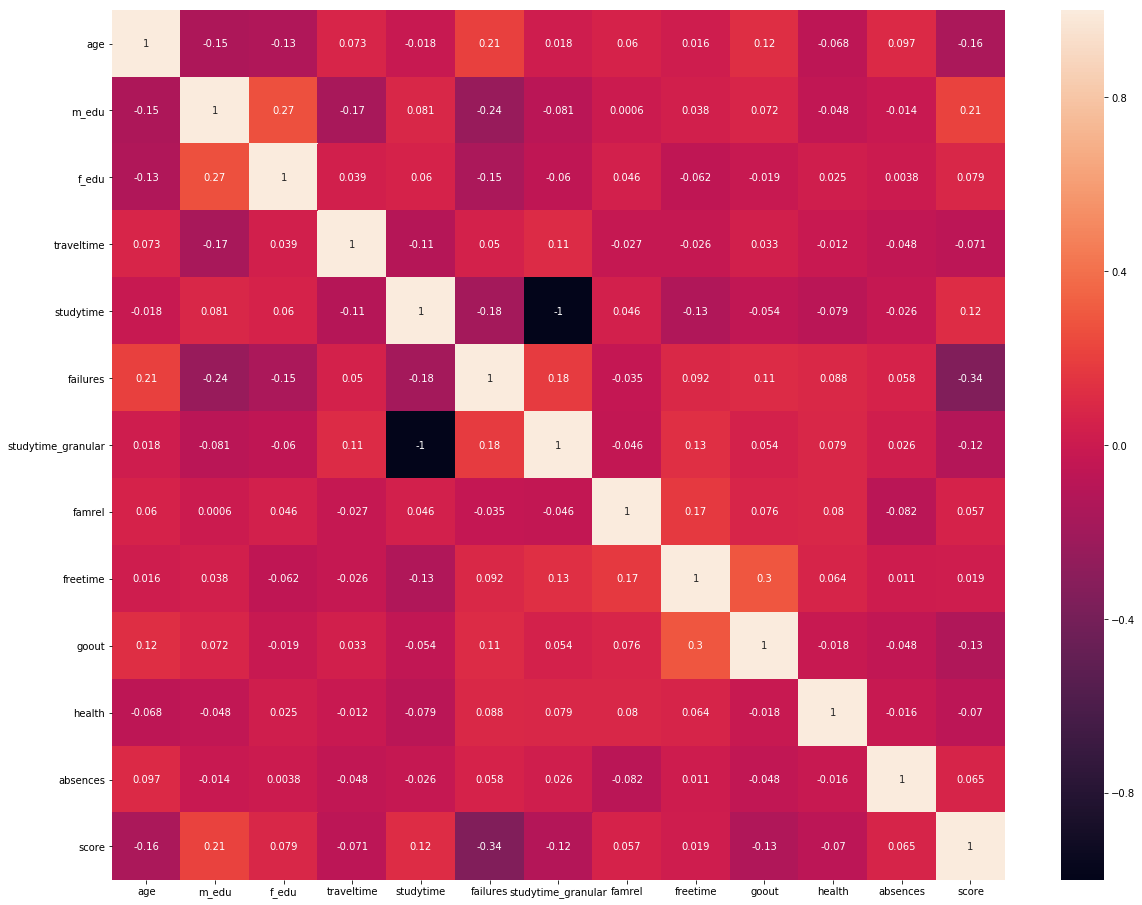

In [6]:
plt.figure(figsize=(20, 16))
sns.heatmap(stud_math.corr(), annot=True) 

Видим, что столбцы studytime и studytime_granular линейно зависимы, удаляем лишний столбец studytime_granular

In [7]:
stud_math.drop(['studytime_granular'], inplace = True, axis = 1) 

## В датасете есть всего три численных признака, проанализируем для начала их. 

При анализе мы будем искать выбросы - поэтому определим функцию, которая умеет считать IQR для заданного столбца

In [8]:
def IQR(df,column):
    IQR = df[column].quantile(0.75) - df[column].quantile(0.25)
    perc25 = df[column].quantile(0.25)
    perc75 = df[column].quantile(0.75)
    if (df[column].max() > (perc75 + 1.5*IQR)) | (df[column].min() < (perc25 - 1.5*IQR)):
        print('В столбце {} есть выбросы'.format(column))
        print("Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
        display(df[column].describe())
        sns.countplot(x = column, data = df)
        plt.show()

### Первый числовой признак. Анализируем возраст

In [9]:
pd.DataFrame(stud_math.age.value_counts()) 

,age
16,103
17,98
15,82
18,80
19,21
20,3
22,1
21,1


count    389.000000
mean      16.673522
std        1.265662
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

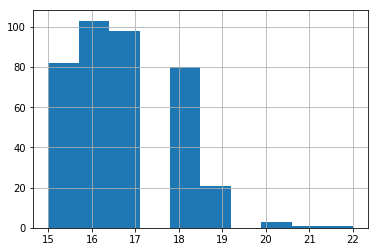

In [10]:
stud_math.age.hist()
stud_math.age.describe()

Мы видим, что в столбце нет пропусков, однако гистограмма выглядит подозрительно, возможно есть выбросы. Посмотрим на боксплот

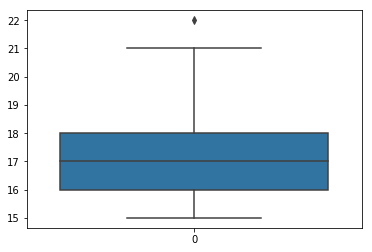

In [11]:
sns.boxplot(data=stud_math.age)

Боксплот говорит что выброс таки есть, проверяем IQR

В столбце age есть выбросы
Границы выбросов: [13.0, 21.0].


count    389.000000
mean      16.673522
std        1.265662
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

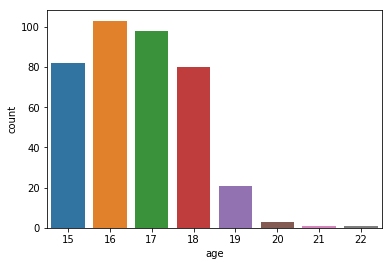

In [12]:
IQR(stud_math,'age')

тут значение 22 становится еще более подозрительным. Это выброс. Удаляем из датасета

In [13]:
stud_math=stud_math.loc[stud_math.age<22]

### Второй числовой признак. Анализируем прогулы

In [14]:
pd.DataFrame(stud_math.absences.value_counts()) 

,absences
0.0,110
2.0,60
4.0,52
6.0,30
8.0,20
10.0,17
12.0,12
14.0,12
3.0,7
16.0,6


count    377.000000
mean       7.297082
std       23.642659
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

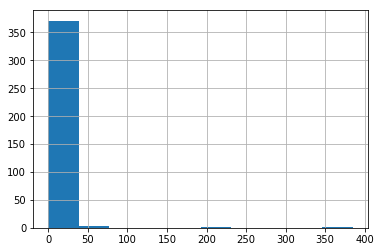

In [15]:
stud_math.absences.hist()
stud_math.absences.describe()

Видим, что у нас две проблемы
1. Кажется, тут могут быть выбросы.
2. Возможно нужно заполнить пропущенные значения
Постмотрим на боксплот

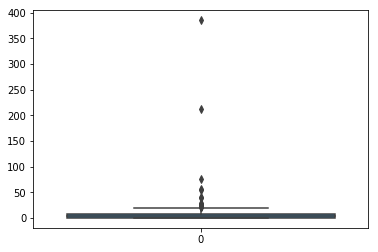

In [16]:
sns.boxplot(data=stud_math.absences)

Боксплот говорит - выбросы есть и много. Посмотрим IQR

В столбце absences есть выбросы
Границы выбросов: [-12.0, 20.0].


count    377.000000
mean       7.297082
std       23.642659
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

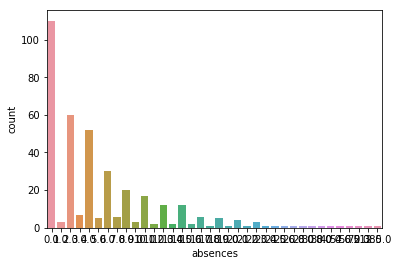

In [17]:
IQR(stud_math,'absences')

Выглядит так, что либо у нас очень грязный столбец - либо распределение отличается от нормального. Покрутим данные 

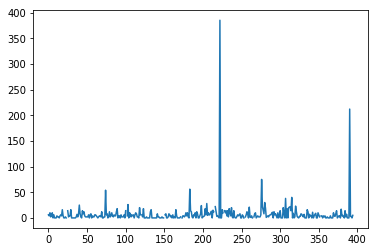

In [18]:
stud_math.absences.plot.line()

Посмотрим внимательно на самые сильно выбивающиеся значения

In [19]:
stud_math[stud_math.absences>200] #отсечку 200 взяли по графику, чисто визуально

,school,sex,age,address,famsize,p_status,m_edu,f_edu,m_job,f_job,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
222,GP,F,16,U,GT3,T,2.0,3.0,services,teacher,other,mother,1.0,2.0,0.0,yes,NaN,no,no,yes,yes,yes,no,2.0,3.0,1.0,3.0,385.0,85.0
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0


Закономерностей в двух подозрительных записях на первый взгляд не видно. 
Посмотрим внимательно на датафрейм без выбросов

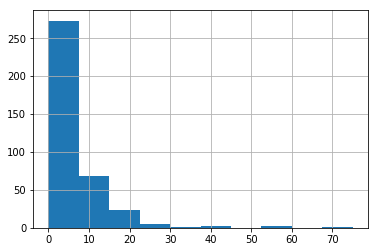

In [20]:
stud_math_without=stud_math[stud_math.absences<200]  
stud_math_without.absences.hist()

а это уже напоминает классическое логарифмическое распределение. Попробуем обойтись без удаления данных и посмотрим на боксплот для логарифма

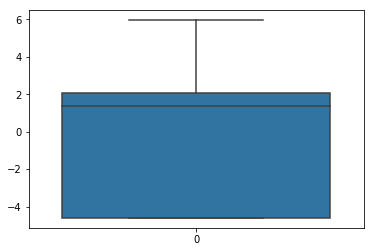

In [21]:
sns.boxplot(data=stud_math.absences.apply(lambda x: math.log(x+0.01)))  
#нужен небольшой сдвиг - с нулем функция не заработает

даже без удаления сильно выбивающихся данных - боксплот для логарифмической функции выбросов не содержит, видимо, мы работали с длинным хвостом логарифмического распределения. Выбросов нет. Теперь попробуем заполнить недостающие данные

In [22]:
absences_fill = stud_math[stud_math.absences.isnull()]
absences_fill

,school,sex,age,address,famsize,p_status,m_edu,f_edu,m_job,f_job,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
24,GP,F,15,R,GT3,T,2.0,4.0,services,health,course,mother,1.0,3.0,0.0,yes,yes,yes,yes,yes,yes,yes,no,4.0,3.0,2.0,5.0,NaN,40.0
101,GP,M,16,U,GT3,T,4.0,4.0,services,teacher,other,father,1.0,3.0,0.0,no,yes,no,yes,yes,yes,yes,yes,4.0,4.0,3.0,4.0,NaN,85.0
120,GP,F,15,U,GT3,T,1.0,2.0,at_home,NaN,course,mother,1.0,2.0,0.0,no,no,no,no,no,yes,yes,no,3.0,2.0,3.0,1.0,NaN,75.0
129,GP,M,16,R,NaN,T,4.0,4.0,teacher,teacher,course,mother,1.0,NaN,0.0,no,no,yes,yes,yes,yes,yes,no,3.0,5.0,5.0,4.0,NaN,90.0
150,GP,M,18,U,LE3,T,1.0,1.0,other,other,course,mother,1.0,1.0,3.0,no,no,no,no,yes,no,yes,yes,2.0,3.0,5.0,4.0,NaN,0.0
172,GP,M,17,U,NaN,T,4.0,4.0,teacher,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,no,4.0,4.0,4.0,5.0,NaN,50.0
215,GP,F,17,U,LE3,T,3.0,2.0,other,other,reputation,mother,2.0,2.0,0.0,no,no,NaN,no,yes,yes,NaN,no,4.0,4.0,4.0,1.0,NaN,75.0
227,GP,M,17,U,LE3,NaN,2.0,3.0,services,services,reputation,father,1.0,NaN,0.0,no,yes,yes,no,no,NaN,yes,no,5.0,3.0,3.0,3.0,NaN,60.0
254,GP,M,17,NaN,NaN,T,2.0,1.0,other,other,course,mother,1.0,1.0,0.0,no,no,no,no,no,yes,yes,no,4.0,4.0,2.0,5.0,NaN,60.0
265,GP,M,18,R,LE3,NaN,3.0,4.0,NaN,other,reputation,mother,2.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,no,4.0,2.0,5.0,1.0,NaN,85.0


Видим, что school=GP у всех записей, кроме одной, p_status=T (либо NaN), schoolsup=no (кроме одной записи)
При построении модели и заполнении пропусков - можно попробовать опираться на распределение значения absences для остальных записей с такими же параметрами, заполнить на данном этапе, без влияния на модель - не представляется возможным

### Третий числовой признак. Анализируем результат

In [23]:
pd.DataFrame(stud_math.score.value_counts())

,score
50.0,54
55.0,46
0.0,37
75.0,33
65.0,31
60.0,31
40.0,30
70.0,27
45.0,27
80.0,16


count    388.000000
mean      52.293814
std       22.940126
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

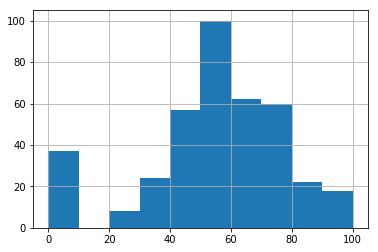

In [24]:
stud_math.score.hist(bins=10)
stud_math.score.describe()

Правая часть выглядит как классическое нормальное распределение. В реальной жизни - я бы уточнила, в каких случаях ставится ноль. Дело в том, что следующее значение после нуля - это 20. То есть либо те, кто получил 0, вовсе не пришли на экзамен - либо есть еще какой-то набор условий, при котором можно получить ноль.

Разобьём наш датасет на два - выделим отдельно тех студентов, у кого нулевой результат, и отдельно - всех остальных

In [25]:
stud_math_pass = stud_math.query('score > 0')
stud_math_fail = stud_math.query('score == 0')

In [26]:
stud_math_pass.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 351 entries, 0 to 394
Data columns (total 29 columns):
school        351 non-null object
sex           351 non-null object
age           351 non-null int64
address       337 non-null object
famsize       327 non-null object
p_status      310 non-null object
m_edu         349 non-null float64
f_edu         330 non-null float64
m_job         334 non-null object
f_job         319 non-null object
reason        336 non-null object
guardian      322 non-null object
traveltime    328 non-null float64
studytime     344 non-null float64
failures      331 non-null float64
schoolsup     342 non-null object
famsup        315 non-null object
paid          315 non-null object
activities    339 non-null object
nursery       339 non-null object
higher        332 non-null object
internet      322 non-null object
romantic      322 non-null object
famrel        327 non-null float64
freetime      343 non-null float64
goout         345 non-null float64
heal

In [27]:
stud_math_fail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37 entries, 128 to 389
Data columns (total 29 columns):
school        37 non-null object
sex           37 non-null object
age           37 non-null int64
address       36 non-null object
famsize       34 non-null object
p_status      33 non-null object
m_edu         36 non-null float64
f_edu         34 non-null float64
m_job         35 non-null object
f_job         33 non-null object
reason        35 non-null object
guardian      35 non-null object
traveltime    32 non-null float64
studytime     37 non-null float64
failures      35 non-null float64
schoolsup     37 non-null object
famsup        35 non-null object
paid          34 non-null object
activities    35 non-null object
nursery       34 non-null object
higher        36 non-null object
internet      32 non-null object
romantic      35 non-null object
famrel        34 non-null float64
freetime      36 non-null float64
goout         36 non-null float64
health        35 non-null flo

#### Проведем корреляционный анализ для обоих датасетов

/Users/ioksana/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/ioksana/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/Users/ioksana/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


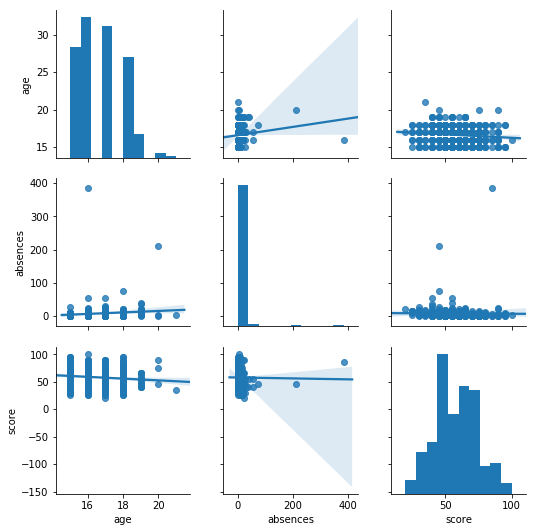

In [28]:
sns.pairplot(stud_math_pass, vars=['age', 'absences', 'score'], kind = 'reg')

In [29]:
stud_math_pass.corr()

,age,m_edu,f_edu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
age,1.000000,-0.128496,-0.115717,0.106431,0.004173,0.193357,0.060890,-0.004895,0.105288,-0.034894,0.111619,-0.121579
m_edu,-0.128496,1.000000,0.247965,-0.165172,0.071324,-0.213732,-0.001558,0.020621,0.080020,-0.037430,-0.027540,0.187362
f_edu,-0.115717,0.247965,1.000000,0.040695,0.046492,-0.136663,0.052347,-0.069734,-0.022746,0.022018,0.000923,0.067631
traveltime,0.106431,-0.165172,0.040695,1.000000,-0.104204,0.102888,-0.021596,-0.021618,0.032921,-0.003545,-0.047003,-0.077795
studytime,0.004173,0.071324,0.046492,-0.104204,1.000000,-0.144656,0.068634,-0.126209,-0.023394,-0.092776,-0.029085,0.138663
failures,0.193357,-0.213732,-0.136663,0.102888,-0.144656,1.000000,-0.027694,0.121114,0.107974,0.090303,0.087925,-0.283792
famrel,0.060890,-0.001558,0.052347,-0.021596,0.068634,-0.027694,1.000000,0.160054,0.044794,0.103703,-0.090936,0.050785
freetime,-0.004895,0.020621,-0.069734,-0.021618,-0.126209,0.121114,0.160054,1.000000,0.294065,0.077300,0.007001,-0.010068
goout,0.105288,0.080020,-0.022746,0.032921,-0.023394,0.107974,0.044794,0.294065,1.000000,-0.000800,-0.052531,-0.177771
health,-0.034894,-0.037430,0.022018,-0.003545,-0.092776,0.090303,0.103703,0.077300,-0.000800,1.000000,-0.012678,-0.081702


#### Какие выводы можно сделать

1. age и score, absences и score слабо скоррелированы
2. Сильно коррелируют образование матери и образование отца
3. Чем старше ученик,тем хуже результат (отрицательная корреляция между столбцами)
4. Чем больше прогулов,тем хуже результат (аналогично, отрицательная корреляция)

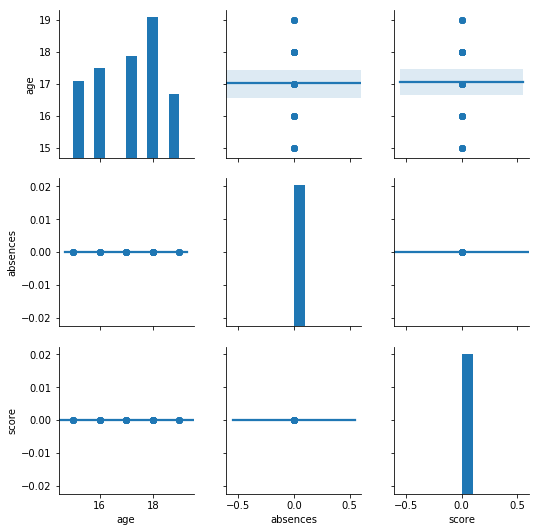

In [30]:
sns.pairplot(stud_math_fail, vars=['age', 'absences', 'score'], kind = 'reg')

In [31]:
stud_math_fail.corr()

,age,m_edu,f_edu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
age,1.000000,-0.277001,-0.308023,-0.173553,-0.043985,-0.062840,-0.013915,0.189722,0.090751,-0.224359,NaN,NaN
m_edu,-0.277001,1.000000,0.763420,-0.139369,0.138471,-0.314499,-0.053375,0.178854,0.024078,-0.104942,NaN,NaN
f_edu,-0.308023,0.763420,1.000000,0.013349,0.243154,-0.257808,-0.038095,0.108777,0.126071,0.040732,NaN,NaN
traveltime,-0.173553,-0.139369,0.013349,1.000000,-0.141737,-0.247421,-0.061199,-0.067848,0.046303,-0.144564,NaN,NaN
studytime,-0.043985,0.138471,0.243154,-0.141737,1.000000,-0.345101,-0.099838,-0.102243,-0.223221,-0.000755,NaN,NaN
failures,-0.062840,-0.314499,-0.257808,-0.247421,-0.345101,1.000000,-0.136602,0.004118,0.031227,0.199496,NaN,NaN
famrel,-0.013915,-0.053375,-0.038095,-0.061199,-0.099838,-0.136602,1.000000,0.279762,0.271268,-0.068486,NaN,NaN
freetime,0.189722,0.178854,0.108777,-0.067848,-0.102243,0.004118,0.279762,1.000000,0.319699,-0.017763,NaN,NaN
goout,0.090751,0.024078,0.126071,0.046303,-0.223221,0.031227,0.271268,0.319699,1.000000,-0.093742,NaN,NaN
health,-0.224359,-0.104942,0.040732,-0.144564,-0.000755,0.199496,-0.068486,-0.017763,-0.093742,1.000000,NaN,NaN


#### Какие выводы можем сделать для студентов с нулевым результатом

1. NaN в матрице - это корреляция нуля с нулём. У всех студентов с нулевым результатом - зафиксировано нулевое количество прогулов. Хорошо бы уточнить этот момент у тех, кто собирал данные для датасета. Возможно, 0 в отсутствиях означает не только отсутствие прогулов
2. Для студентов с нулевым результатом - образование матери и отца коррелируют немного сильнее, чем для студентов с ненулевым результатом 

### Напишем функцию для анализа категорийных признаков

In [32]:
def category_analysis(df,column):
    df[column] = df[column].apply(lambda x: None if x == 'nan' else x )
    print('В столбце {} найдено {} уникальных значения'.format(column,len(df[column].unique())))
    print(df[column].unique())
    sns.countplot(x = column, data = df)
    plt.show()
    print('Значений, встречающихся более 15 раз: {}'.format((df[column].value_counts()>=15).sum()))

Теперь положим названия столбцов stud_math_pass в список

In [33]:
columns_list=stud_math_pass.columns.values.tolist()

### Применим нашу функцию к списку и проанализируем stud_math_pass

В столбце school найдено 2 уникальных значения
['GP' 'MS']


/Users/ioksana/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


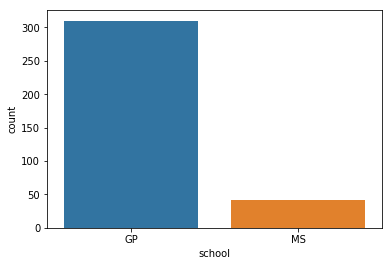

Значений, встречающихся более 15 раз: 2
В столбце sex найдено 2 уникальных значения
['F' 'M']


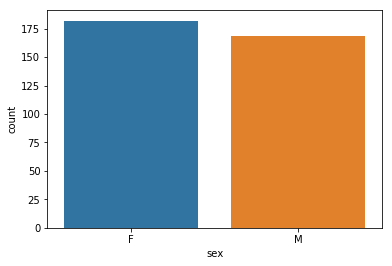

Значений, встречающихся более 15 раз: 2
В столбце address найдено 3 уникальных значения
['U' nan 'R']


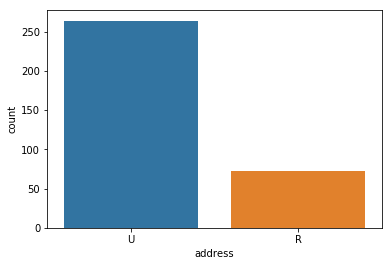

Значений, встречающихся более 15 раз: 2
В столбце famsize найдено 3 уникальных значения
[nan 'GT3' 'LE3']


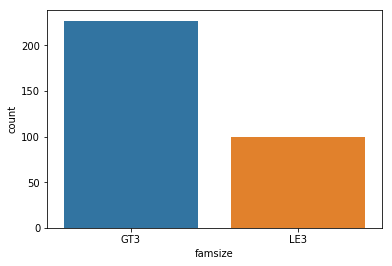

Значений, встречающихся более 15 раз: 2
В столбце p_status найдено 3 уникальных значения
['A' nan 'T']


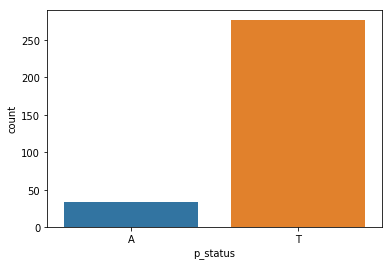

Значений, встречающихся более 15 раз: 2
В столбце m_edu найдено 6 уникальных значения
[ 4.  1.  3.  2. nan  0.]


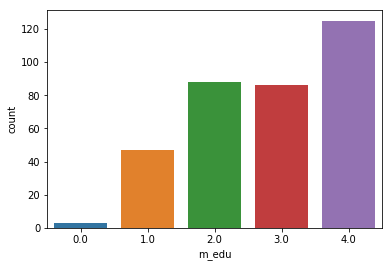

Значений, встречающихся более 15 раз: 4
В столбце f_edu найдено 7 уникальных значения
[ 4.  1.  2.  3. 40. nan  0.]


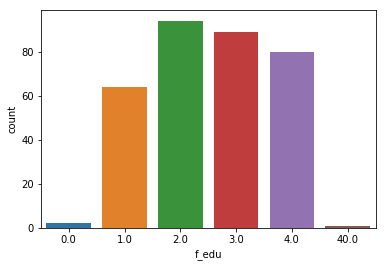

Значений, встречающихся более 15 раз: 4
В столбце m_job найдено 6 уникальных значения
['at_home' 'health' 'other' 'services' 'teacher' nan]


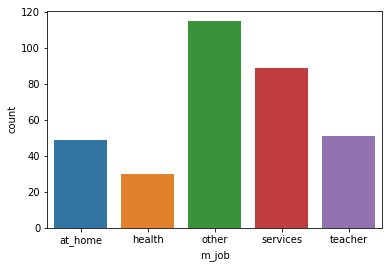

Значений, встречающихся более 15 раз: 5
В столбце f_job найдено 6 уникальных значения
['teacher' 'other' nan 'health' 'services' 'at_home']


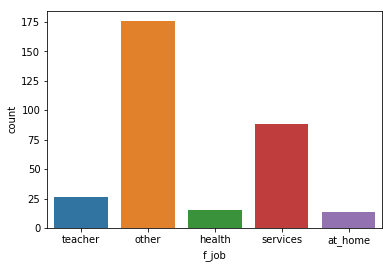

Значений, встречающихся более 15 раз: 4
В столбце reason найдено 5 уникальных значения
['course' 'other' 'home' 'reputation' nan]


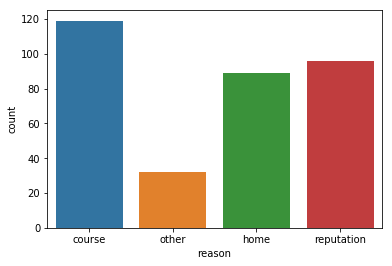

Значений, встречающихся более 15 раз: 4
В столбце guardian найдено 4 уникальных значения
['mother' 'father' 'other' nan]


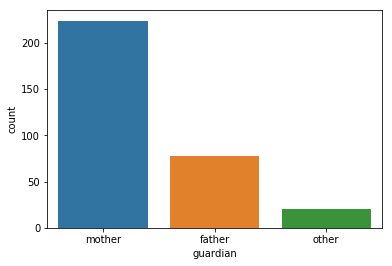

Значений, встречающихся более 15 раз: 3
В столбце traveltime найдено 5 уникальных значения
[ 2.  1.  3. nan  4.]


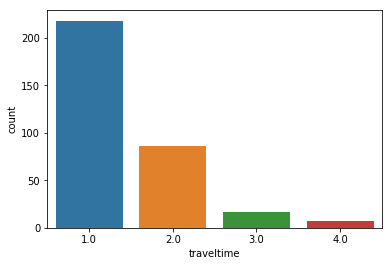

Значений, встречающихся более 15 раз: 3
В столбце studytime найдено 5 уникальных значения
[ 2.  3.  1. nan  4.]


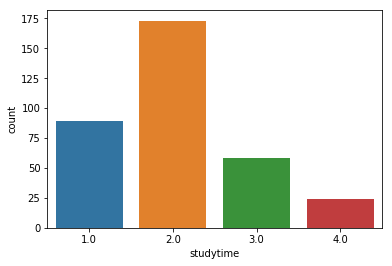

Значений, встречающихся более 15 раз: 4
В столбце failures найдено 5 уникальных значения
[ 0.  3. nan  2.  1.]


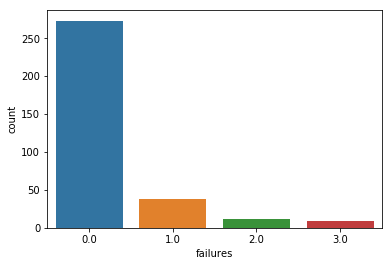

Значений, встречающихся более 15 раз: 2
В столбце schoolsup найдено 3 уникальных значения
['yes' 'no' nan]


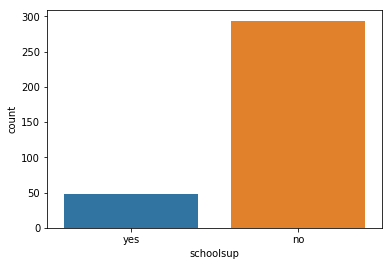

Значений, встречающихся более 15 раз: 2
В столбце famsup найдено 3 уникальных значения
['no' 'yes' nan]


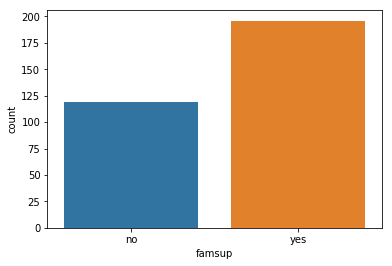

Значений, встречающихся более 15 раз: 2
В столбце paid найдено 3 уникальных значения
['no' nan 'yes']


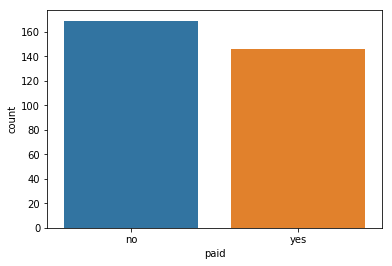

Значений, встречающихся более 15 раз: 2
В столбце activities найдено 3 уникальных значения
['no' 'yes' nan]


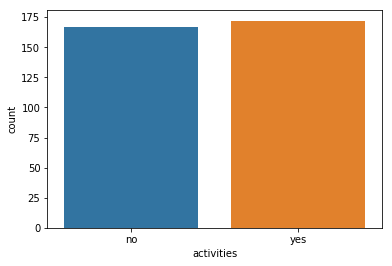

Значений, встречающихся более 15 раз: 2
В столбце nursery найдено 3 уникальных значения
['yes' 'no' nan]


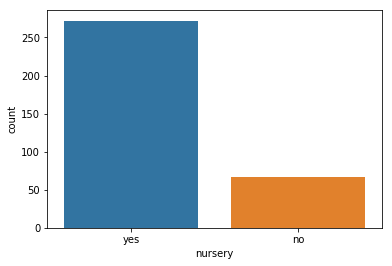

Значений, встречающихся более 15 раз: 2
В столбце higher найдено 3 уникальных значения
['yes' nan 'no']


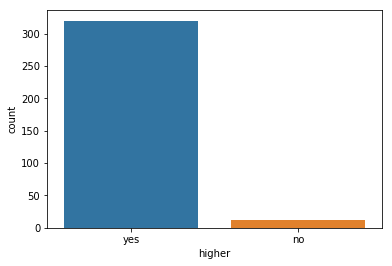

Значений, встречающихся более 15 раз: 1
В столбце internet найдено 3 уникальных значения
[nan 'yes' 'no']


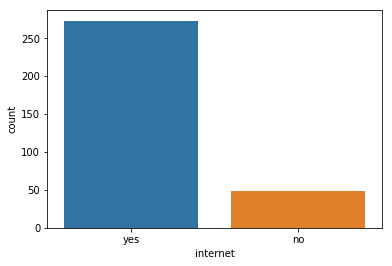

Значений, встречающихся более 15 раз: 2
В столбце romantic найдено 3 уникальных значения
['no' nan 'yes']


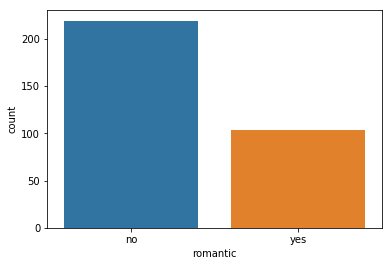

Значений, встречающихся более 15 раз: 2
В столбце famrel найдено 7 уникальных значения
[ 4.  5.  3. nan -1.  2.  1.]


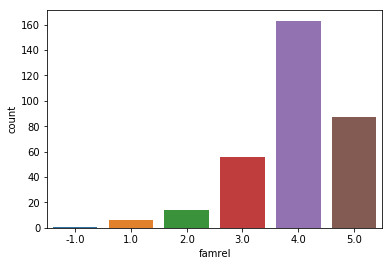

Значений, встречающихся более 15 раз: 3
В столбце freetime найдено 6 уникальных значения
[ 3.  2.  4.  1.  5. nan]


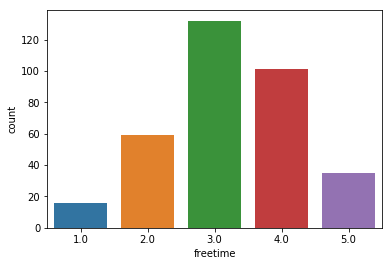

Значений, встречающихся более 15 раз: 5
В столбце goout найдено 6 уникальных значения
[ 4.  3.  2.  1.  5. nan]


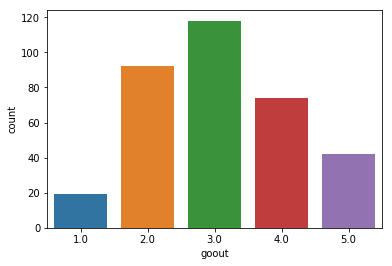

Значений, встречающихся более 15 раз: 5
В столбце health найдено 6 уникальных значения
[ 3.  5.  1.  2.  4. nan]


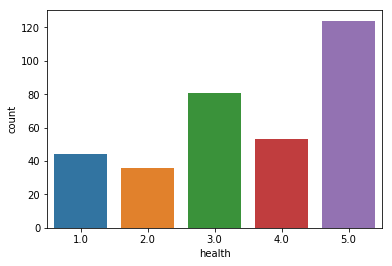

Значений, встречающихся более 15 раз: 5


In [34]:
for column in columns_list:
    if column not in ('age','score','absences'):
        category_analysis(stud_math_pass,column) #берем 5% от размера датасета

Всего в датафрейме stud_math_pass 350 записей, данные, встречающиеся чаще чем в 5%, подсветили отдельно 

В столбце f_edu найдено 7 уникальных значения, одно из этих значений -40. 
наиболее вероятно это опечатка, исправим её

In [35]:
stud_math.loc[stud_math['f_edu'] == 40.0, 'f_edu'] = 4.0

В столбце famrel найдено 7 уникальных значения, одно из этих значений -1.
наиболее вероятно это тоже опечатка

In [36]:
stud_math.loc[stud_math['famrel'] == -1, 'famrel'] = 1.0

### Примерним функцию к stud_math_fail

В столбце school найдено 2 уникальных значения
['GP' 'MS']


/Users/ioksana/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


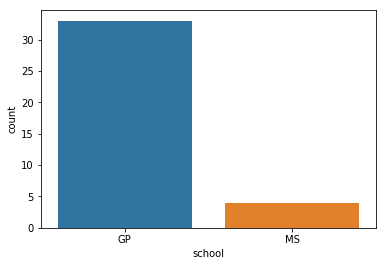

Значений, встречающихся более 15 раз: 1
В столбце sex найдено 2 уникальных значения
['M' 'F']


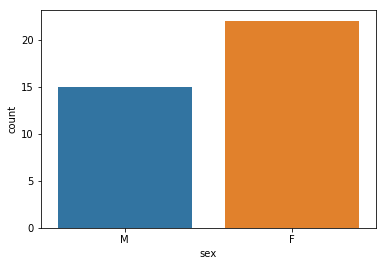

Значений, встречающихся более 15 раз: 2
В столбце address найдено 3 уникальных значения
['R' 'U' nan]


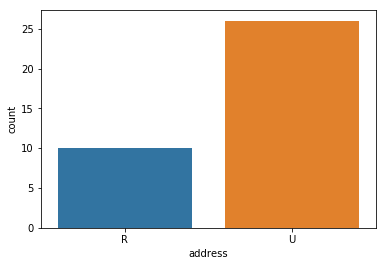

Значений, встречающихся более 15 раз: 1
В столбце famsize найдено 3 уникальных значения
[nan 'GT3' 'LE3']


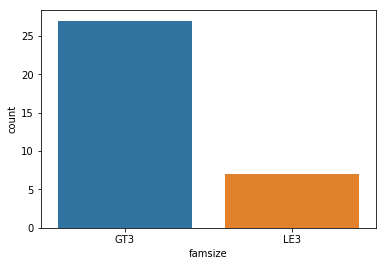

Значений, встречающихся более 15 раз: 1
В столбце p_status найдено 3 уникальных значения
['T' nan 'A']


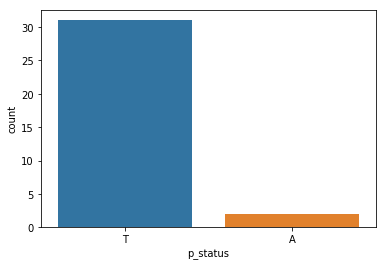

Значений, встречающихся более 15 раз: 1
В столбце m_edu найдено 5 уникальных значения
[ 2.  3.  1.  4. nan]


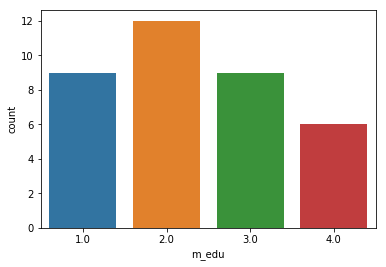

Значений, встречающихся более 15 раз: 0
В столбце f_edu найдено 5 уникальных значения
[ 2.  4.  1. nan  3.]


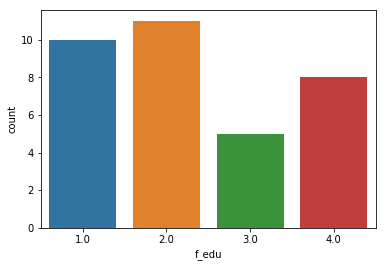

Значений, встречающихся более 15 раз: 0
В столбце m_job найдено 6 уникальных значения
[nan 'services' 'at_home' 'other' 'teacher' 'health']


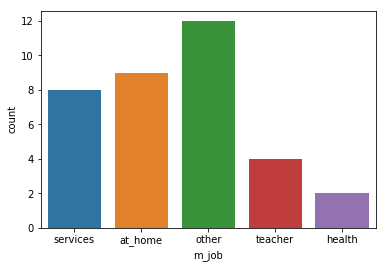

Значений, встречающихся более 15 раз: 0
В столбце f_job найдено 5 уникальных значения
['other' 'teacher' nan 'services' 'at_home']


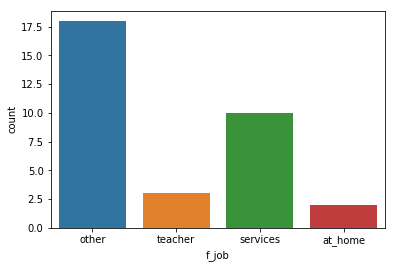

Значений, встречающихся более 15 раз: 1
В столбце reason найдено 5 уникальных значения
['reputation' 'course' nan 'home' 'other']


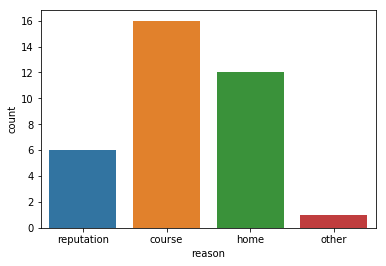

Значений, встречающихся более 15 раз: 1
В столбце guardian найдено 4 уникальных значения
['mother' 'father' 'other' nan]


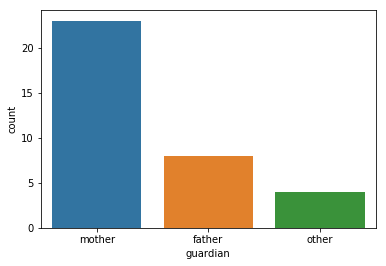

Значений, встречающихся более 15 раз: 1
В столбце traveltime найдено 4 уникальных значения
[ 1.  2.  3. nan]


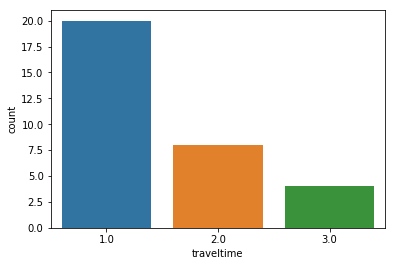

Значений, встречающихся более 15 раз: 1
В столбце studytime найдено 4 уникальных значения
[1. 3. 2. 4.]


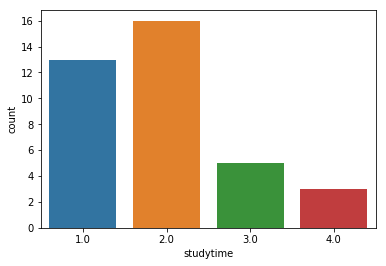

Значений, встречающихся более 15 раз: 1
В столбце failures найдено 5 уникальных значения
[ 2.  0.  3. nan  1.]


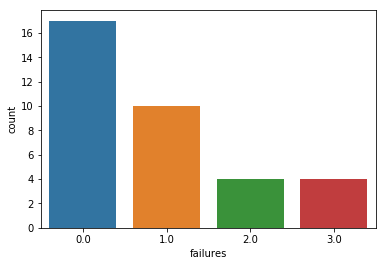

Значений, встречающихся более 15 раз: 1
В столбце schoolsup найдено 2 уникальных значения
['no' 'yes']


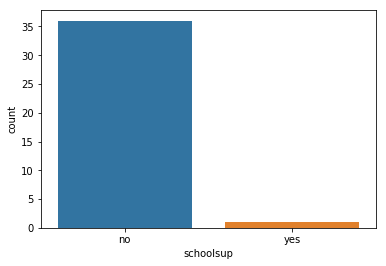

Значений, встречающихся более 15 раз: 1
В столбце famsup найдено 3 уникальных значения
['yes' 'no' nan]


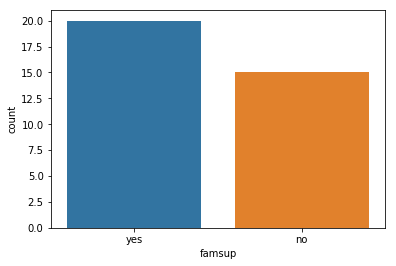

Значений, встречающихся более 15 раз: 2
В столбце paid найдено 3 уникальных значения
['no' nan 'yes']


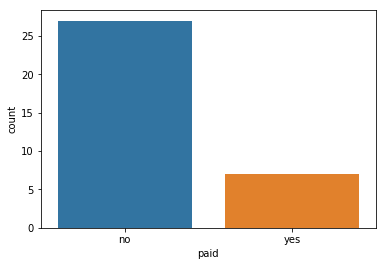

Значений, встречающихся более 15 раз: 1
В столбце activities найдено 3 уникальных значения
['yes' 'no' nan]


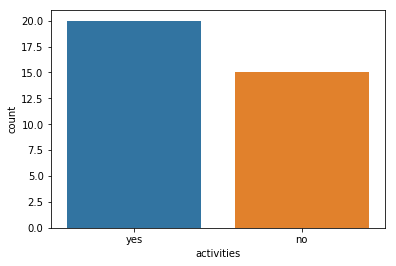

Значений, встречающихся более 15 раз: 2
В столбце nursery найдено 3 уникальных значения
['yes' 'no' nan]


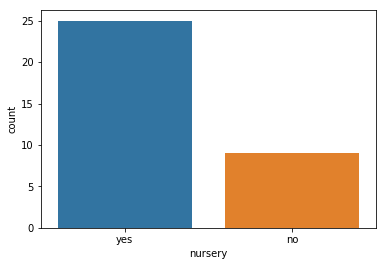

Значений, встречающихся более 15 раз: 1
В столбце higher найдено 3 уникальных значения
['yes' 'no' nan]


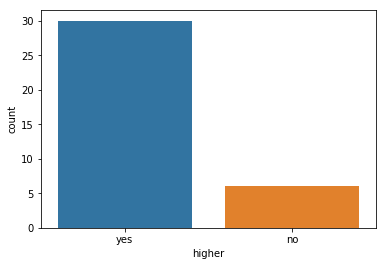

Значений, встречающихся более 15 раз: 1
В столбце internet найдено 3 уникальных значения
['yes' 'no' nan]


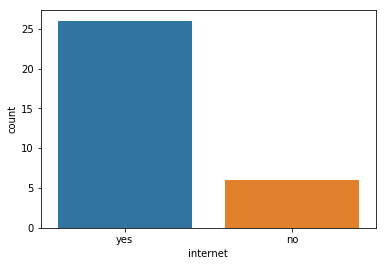

Значений, встречающихся более 15 раз: 1
В столбце romantic найдено 3 уникальных значения
['no' 'yes' nan]


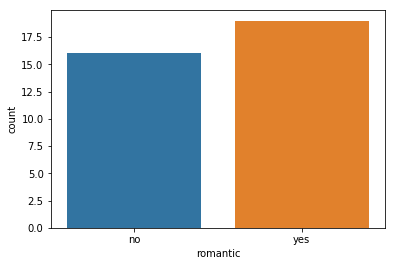

Значений, встречающихся более 15 раз: 2
В столбце famrel найдено 6 уникальных значения
[ 3.  4.  5. nan  2.  1.]


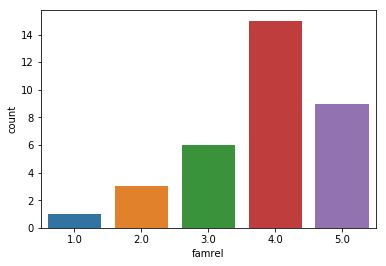

Значений, встречающихся более 15 раз: 1
В столбце freetime найдено 6 уникальных значения
[ 3.  2. nan  4.  5.  1.]


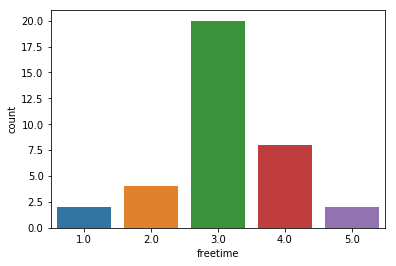

Значений, встречающихся более 15 раз: 1
В столбце goout найдено 6 уникальных значения
[ 3.  2.  5.  4. nan  1.]


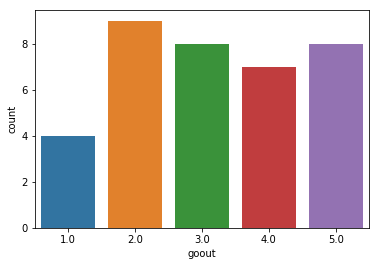

Значений, встречающихся более 15 раз: 0
В столбце health найдено 6 уникальных значения
[ 4.  5.  3. nan  2.  1.]


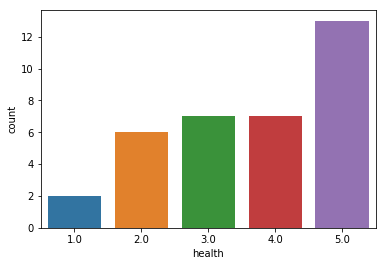

Значений, встречающихся более 15 раз: 0


In [37]:
for column in columns_list:
    if column not in ('age','score','absences'):
        category_analysis(stud_math_fail,column)

### Значимых различий в поведении датафреймов выявить не удалось, возвращаемся к работе с единым датафреймом

Заполнять пропуски пока не осмысленно
1. бОльшая часть nan встречается реже, чем в 5% случаев
2. пропуски guardian и p_status пока не понятно, по какому принципу можно заполнить
Зато хорошо бы посмотреть на попарную корреляцию наших категорийных признаков и итогового результата. 
Напишем функцию, которая построит боксплот

In [38]:
def boxplot_analysis(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', data=stud_math)
    ax.set_title('Боксплот для ' + column)
    plt.show()

Посмотрим как ведет себя боксплот для stud_math

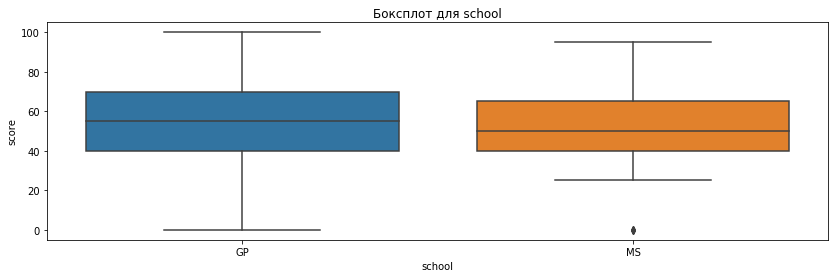

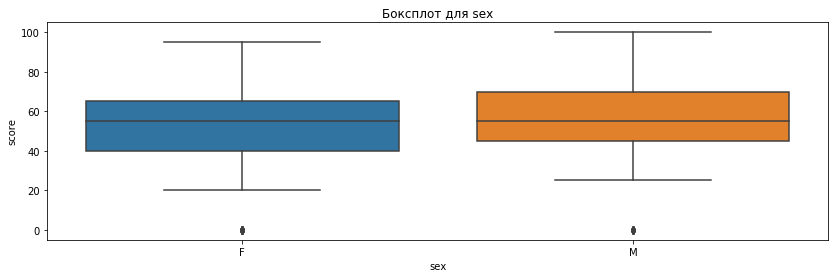

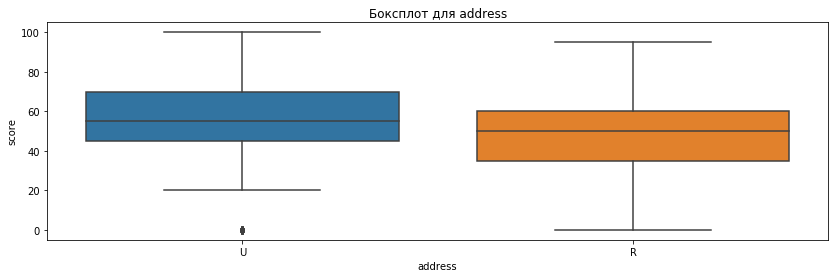

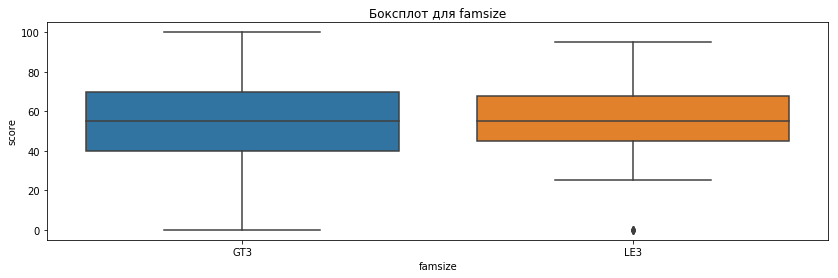

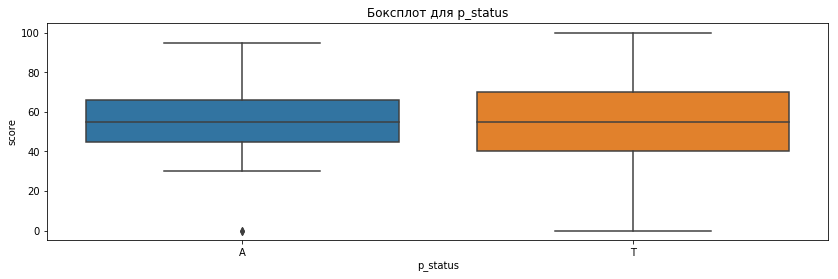

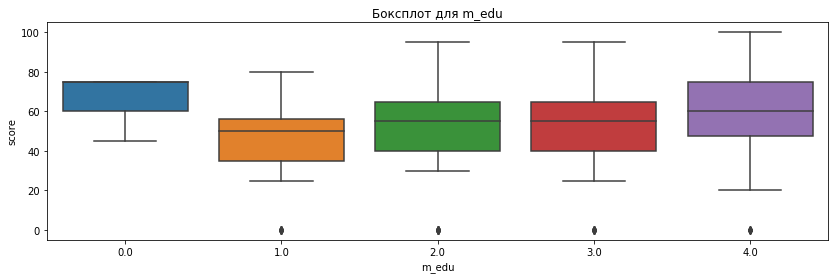

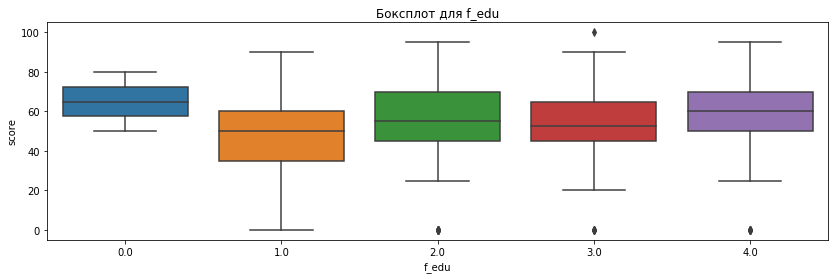

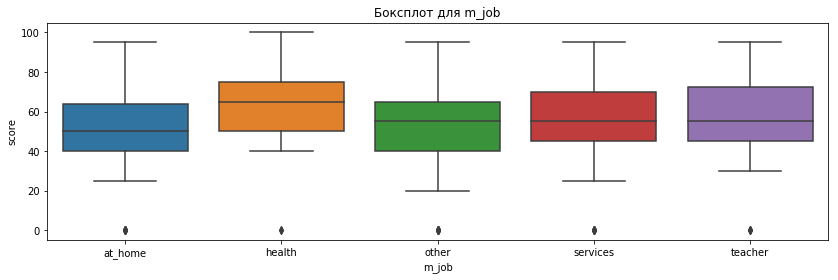

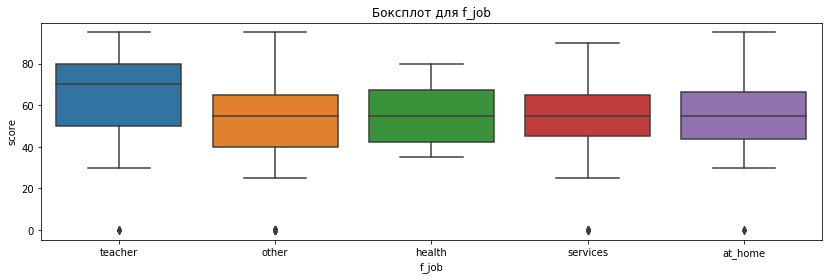

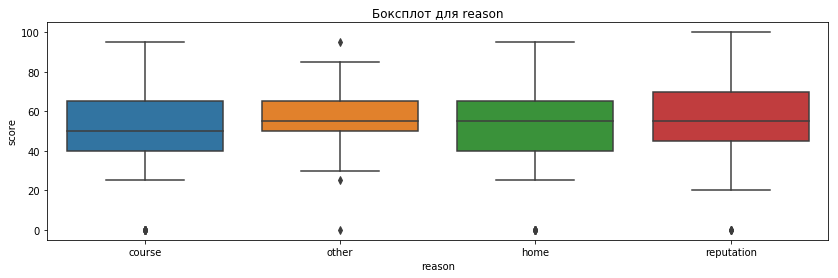

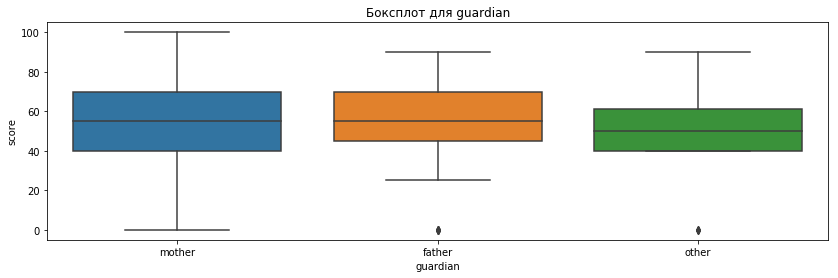

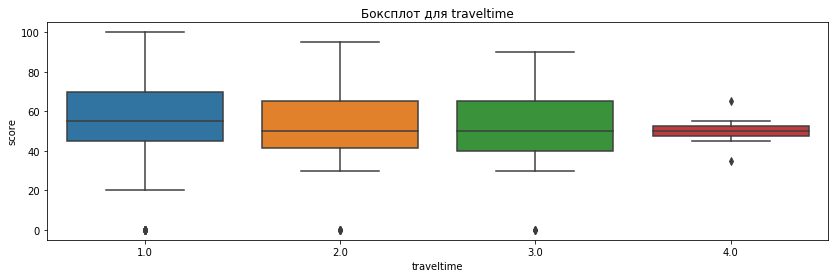

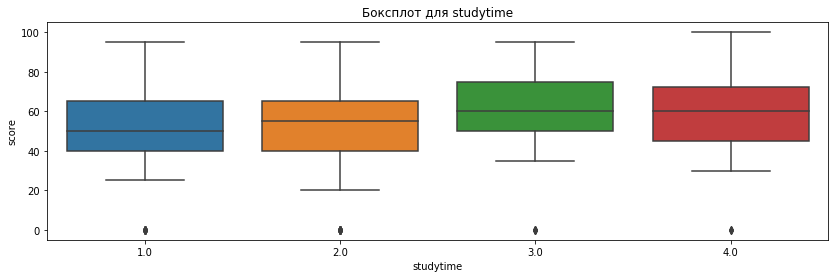

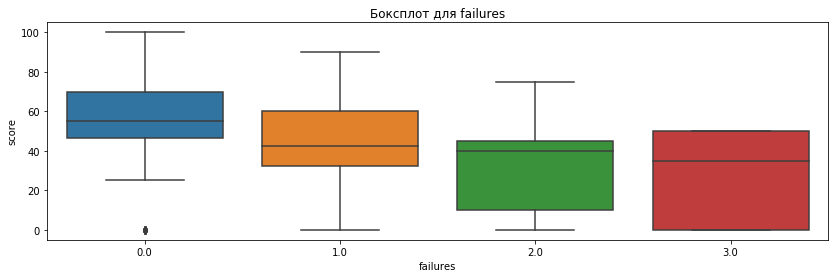

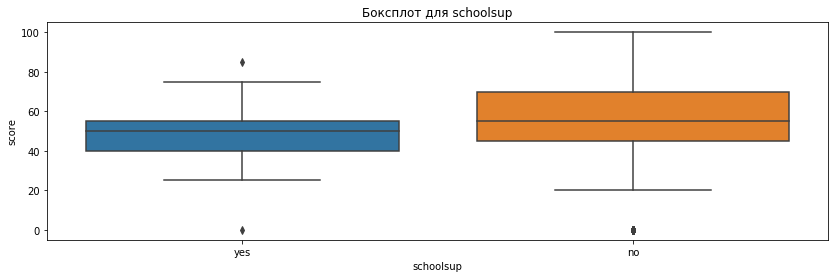

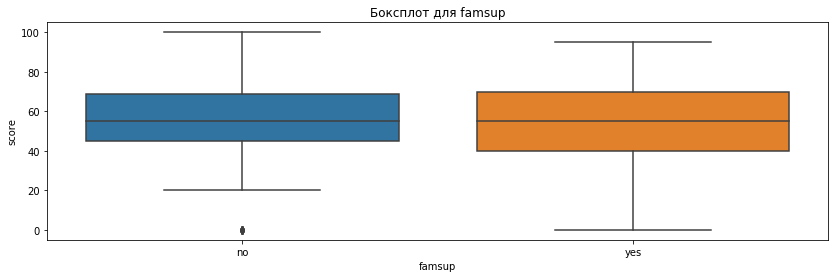

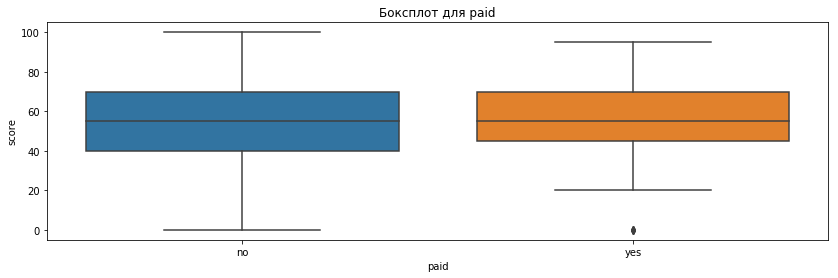

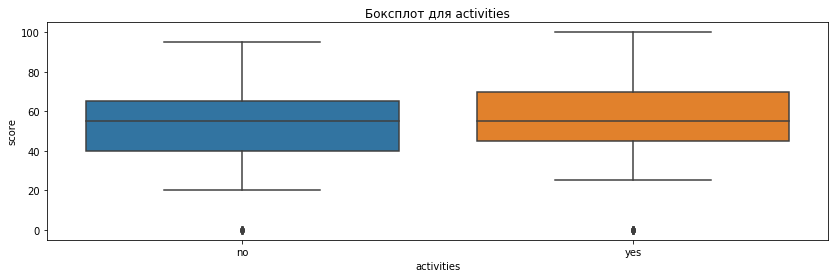

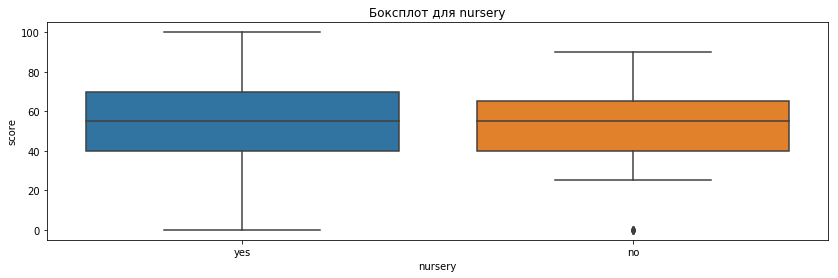

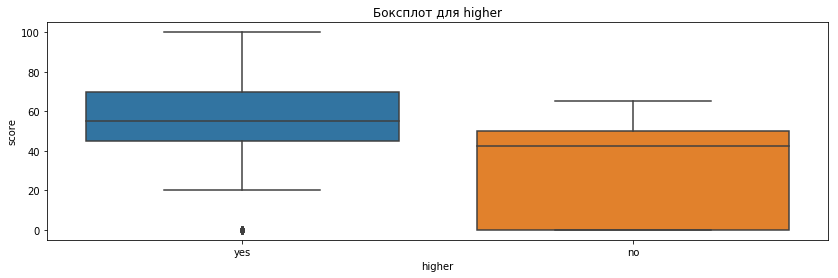

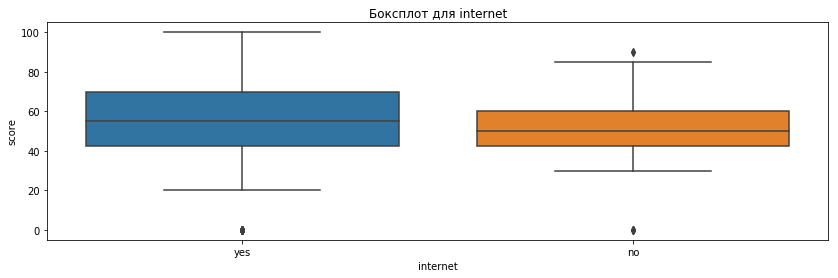

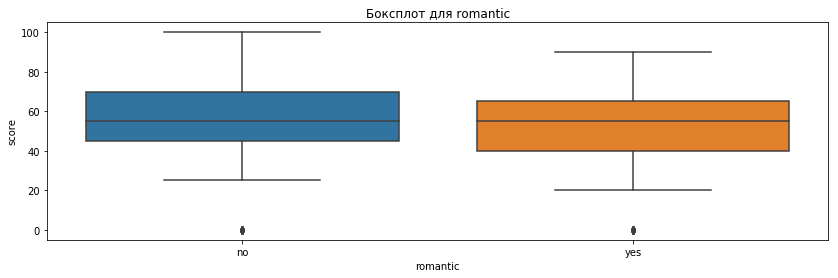

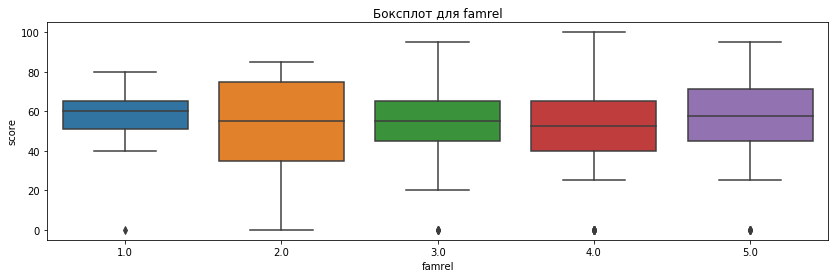

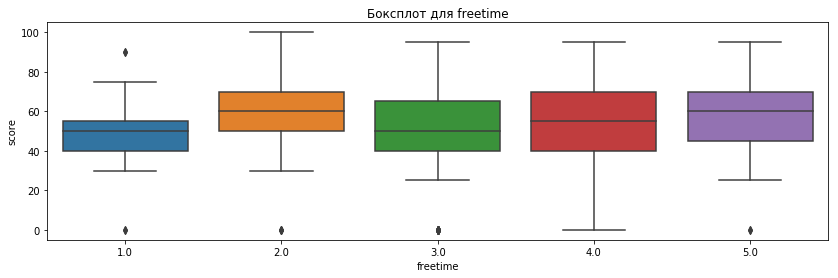

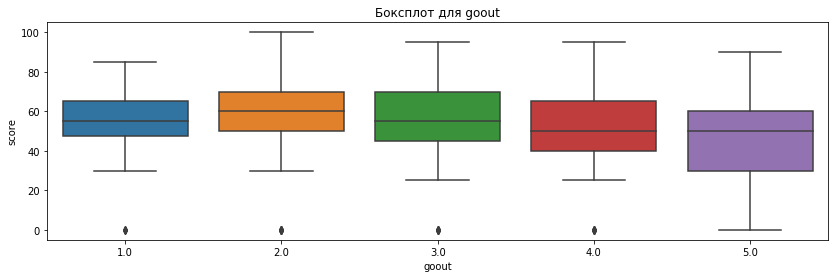

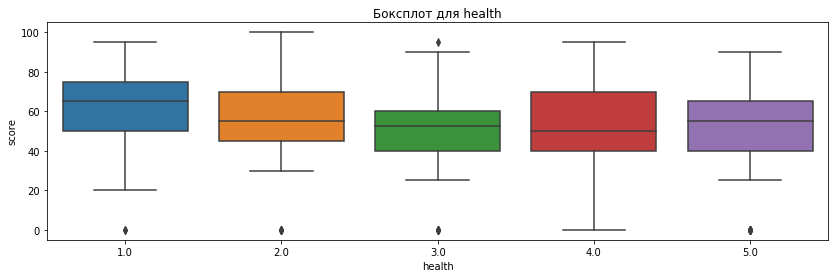

In [39]:
for column in columns_list:
    if column not in ('age','score','absences'):
        boxplot_analysis(column)

#### Визуально значимо различаются результаты для m_edu, f_edu, failures, higher. Так же различаются результаты для address, m_job, f_job, goot. Есть предположение, что это и есть нужный нам список переменных

#### Теперь проверим критерий Стьюдента

In [44]:
def get_stat_dif(column):
    cols = stud_math.loc[:, column].value_counts().index[:]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud_math.loc[stud_math.loc[:, column] == comb[0], 'score'], 
                        stud_math.loc[stud_math.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [45]:
for column in columns_list:
    if column not in ('age','score','absences'):
        get_stat_dif(column)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки m_edu
Найдены статистически значимые различия для колонки m_job
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


Как мы видим, значимыми являются следующие номинативные параметры: sex, address, m_edu, m_job, failures, higher и romantic

In [42]:
ml_prepared = stud_math.loc[:, ['age','absences','sex','address','m_edu','m_job',
                               'failures','higher','romantic', 'score']]                             
ml_prepared

,age,absences,sex,address,m_edu,m_job,failures,higher,romantic,score
0,18,6.0,F,U,4.0,at_home,0.0,yes,no,30.0
1,17,4.0,F,U,1.0,at_home,0.0,yes,no,30.0
2,15,10.0,F,U,1.0,at_home,3.0,yes,NaN,50.0
3,15,2.0,F,U,4.0,health,0.0,yes,yes,75.0
4,16,4.0,F,U,3.0,other,0.0,yes,no,50.0
5,16,10.0,M,U,4.0,services,0.0,yes,no,75.0
6,16,0.0,M,NaN,2.0,other,0.0,yes,no,55.0
7,17,6.0,F,U,4.0,other,0.0,yes,no,30.0
8,15,0.0,M,U,3.0,services,0.0,yes,no,95.0
9,15,0.0,M,U,3.0,other,0.0,yes,no,75.0


Для того чтобы загрузить данные в модель, необходимо привести их к численным значениям. Создадим словарь из возможных значений - и их численных замен. Проще всего с признаками, имеющими значения yes или no - заменим соответственно 1 и 0 

In [43]:
#Здесь можно сделать красивее, но не успеваю, поэтому замены "в лоб"
#пользуюсь тем, что множества значений столбцов не пересекаются и данные так не попортим
ml_prepared = ml_prepared.replace('yes', 1)
ml_prepared = ml_prepared.replace('no', 0)
#для столбца sex
ml_prepared = ml_prepared.replace('M', 1)
ml_prepared = ml_prepared.replace('F', 0)
#для столбца address
ml_prepared = ml_prepared.replace('U', 1)
ml_prepared = ml_prepared.replace('R', 0)
#для столбца m_job 
ml_prepared = ml_prepared.replace('teacher', -1)
ml_prepared = ml_prepared.replace('health', -2)
ml_prepared = ml_prepared.replace('services', -3)
ml_prepared = ml_prepared.replace('at_home', -4)
ml_prepared = ml_prepared.replace('other', -5)
#и дочищаем NaN, заменяем на -10 чтобы не потерять в дальнейшем
ml_prepared.fillna(-10, inplace=True)
ml_prepared

,age,absences,sex,address,m_edu,m_job,failures,higher,romantic,score
0,18,6.0,0,1.0,4.0,-4.0,0.0,1.0,0.0,30.0
1,17,4.0,0,1.0,1.0,-4.0,0.0,1.0,0.0,30.0
2,15,10.0,0,1.0,1.0,-4.0,3.0,1.0,-10.0,50.0
3,15,2.0,0,1.0,4.0,-2.0,0.0,1.0,1.0,75.0
4,16,4.0,0,1.0,3.0,-5.0,0.0,1.0,0.0,50.0
5,16,10.0,1,1.0,4.0,-3.0,0.0,1.0,0.0,75.0
6,16,0.0,1,-10.0,2.0,-5.0,0.0,1.0,0.0,55.0
7,17,6.0,0,1.0,4.0,-5.0,0.0,1.0,0.0,30.0
8,15,0.0,1,1.0,3.0,-3.0,0.0,1.0,0.0,95.0
9,15,0.0,1,1.0,3.0,-5.0,0.0,1.0,0.0,75.0


Выводы:
Для анализа данных был получен датасет с описанием условий жизни учащихся в возрасте от 15 до 22 лет и результатами их итогового экзамена по математике.

1. Только 3 столбца из 29 заполнены полностью.
2. В датасете было мало пустых значений - не более 5% для большинства столбцов, максимальный процент пропусков - 12%
3. В данных содержались выбросы: 
    3.1 для столбцов famrel и fedu - скорее опечатки, заменили на корректные значения 
    3.2 выброс в age - удалён (возраст 22) 
    3.3 под подозрением на наличие выбросов был столбец absences - но его распределение является логнормальным
4. Был найден линейно зависимый столбец studytime_granular - удалён
5. Была выявлена прямая зависимость нулевых значений в score и нулевой посещаемости, датасет был модифицирован
6. Значимых критериев для дальнейшего построения модели 10, это: age, absences, sex, address, m_edu, m_job, failures, higher, romantic, score

Результат работы включает полностью подготовленный числовой датасет ml_prepared

## Описание получившегося датасета ml_prepared
1. age — возраст ученика (от 15 до 22)
2. absences — количество пропущенных занятий
3. sex - пол ученика (0 - женский, 1 - мужской)
4. address - тип адреса ученика ('U' - городской, 'R' - за городом)
5. m_edu - образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
6. f_edu - образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
7. m_job - работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
8. f_job - работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
9. studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)
10. failures - количество внеучебных неудач (n, если 1<=n<3, иначе 0)
11. schoolsup - дополнительная образовательная поддержка (yes или no)
12. goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)
13. paid — дополнительные платные занятия по математике (yes или no)
14. higher — хочет получить высшее образование (yes или no)
15. score — баллы по госэкзамену по математике